<a href="https://colab.research.google.com/github/yoruyoruuu/Midterm-Machine-Vision-2014945-/blob/main/MuhdHakimi(2014945)_Midterm_MV_SEM1_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: The shape of the output is ....5×5......
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [/] Individual feature map
 - [/] Instance in the mini-batch
 - [ ] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [/] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [/] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )



```
# This is formatted as code
```

<span style="color:blue">
    answer: There are ....122.... learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [/] Deep neural networks usually require a big amount of data to be properly trained.
- [/] They can be fooled by adversarial/ noisy examples.
- [/] They are difficult to interpret and understand.
- [/] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

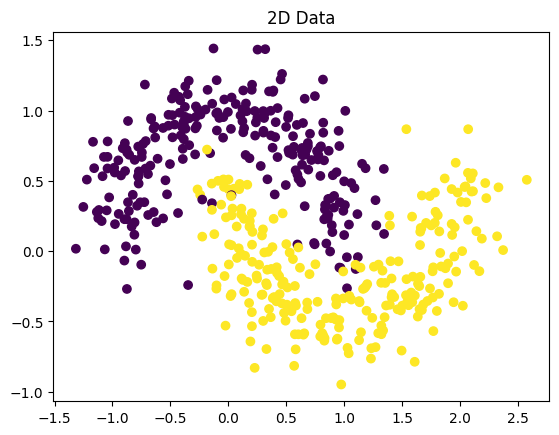

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer:The data cannot be correctly separated using the calssifier above. The nn.Linear performs a linear transformation on the input data while the nn.Sigmoid applies the sigmoid activation function element-wise to the output of the linear layer. This classfier is relatively simple and might struggle with complex, non-linear relationships in the data and it may not be sufficient to capture the intricate patterns in the moons dataset, which is known to require a non-linear decision boundary for accurate classification.
</span>

# Question 2

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [1]:
# IMPORT LIBRARY = TORCH, TORCHVISION (FOR CIFAR-10)
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt        #for plotting purpose

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# transform = transforms.Compose(
#     #  transforms.Augmix(),
#     #  transforms.CenterCrop(),
#     [transforms.Resize((32,32)),
#      transforms.ToTensor(),
#      transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
# )

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '//content/drive/MyDrive/Covid19-dataset/test'



train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [4]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [5]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [7]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([4, 3, 224, 224]), torch.Size([4]))

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ModifiedCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Max-pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, num_classes)  # Change the output size to num_classes

    def forward(self, x):
        # Convolutional layers with ReLU and max-pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Flatten the output for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the model for 3 classes
model = ModifiedCNN(num_classes=3)

print(model)



ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)


In [ ]:
import torch
torch.cuda.is_available()

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001, momentum=0.09, weight_decay=1e-4)

# move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [ ]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.1003, Accuracy: 39.1304%, 
		Validation : Loss : 1.0970, Accuracy: 39.3939%, Time: 11.4406s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.0796, Accuracy: 46.6403%, 
		Validation : Loss : 1.0802, Accuracy: 48.4848%, Time: 11.4853s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.0585, Accuracy: 50.9881%, 
		Validation : Loss : 1.0616, Accuracy: 53.0303%, Time: 10.5066s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.0335, Accuracy: 56.9170%, 
		Validation : Loss : 1.0383, Accuracy: 53.0303%, Time: 10.4682s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.0031, Accuracy: 60.4743%, 
		Validation : Loss : 1.0097, Accuracy: 57.5758%, Time: 11.3355s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.9640, Accuracy: 64.0316%, 
		Validation : Loss : 0.9720, Accuracy: 62.1212%, Time: 11.2771s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.9148, Accuracy: 71.5415%, 
		Validation : Loss : 0.9285, Accuracy: 63.6364%, Time: 10.3499s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.8584, Accura

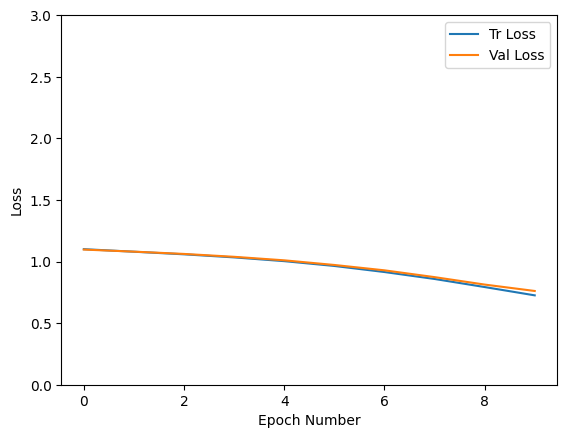

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

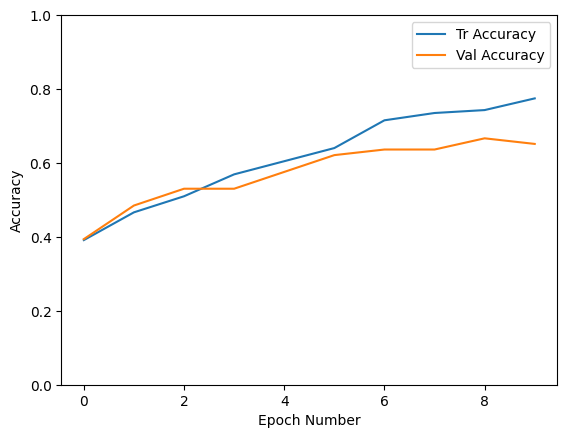

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>YES. Because there is a gap between the training and validation accuracy that indicates potential overfitting. The training accuracy is much higher than the validation accuracy, hence the model may be memorizing the training data instead of generalizing.</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Dropout which is a regularization technique designed to prevent overfitting in neural networks by randomly deactivating (dropping out) a fraction of neurons during each training iteration. (2) Batch Normalization which is a technique used in deep neural networks to improve training stability, accelerate convergence, and mitigate the effects of overfitting.</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)



```
# This is formatted as code
```

# Dropout Method

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ModifiedCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Max-pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Implementing Batch Normalization
        self.batch_norm1 = nn.BatchNorm2d(6)
        self.batch_norm2 = nn.BatchNorm2d(16)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # 50% dropout applied
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, num_classes)

    def forward(self, x):
        # Convolutional layers with ReLU, batch normalization, and max-pooling
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))

        # Flatten the output for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully connected layers with ReLU activation and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Applying dropout after first fully connected layer
        x = self.fc2(x)

        return x

# Instantiate the model for 3 classes
model = ModifiedCNN(num_classes=3)

print(model)


ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)


In [ ]:
import torch
torch.cuda.is_available()

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.001, momentum = 0.09)

# move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [ ]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.0926, Accuracy: 44.6640%, 
		Validation : Loss : 1.0105, Accuracy: 60.6061%, Time: 138.6465s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.9639, Accuracy: 60.0791%, 
		Validation : Loss : 0.9042, Accuracy: 81.8182%, Time: 11.6455s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.8675, Accuracy: 71.1462%, 
		Validation : Loss : 0.8336, Accuracy: 77.2727%, Time: 11.3096s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.7504, Accuracy: 77.8656%, 
		Validation : Loss : 0.7456, Accuracy: 81.8182%, Time: 10.4454s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.6691, Accuracy: 81.4229%, 
		Validation : Loss : 0.6841, Accuracy: 80.3030%, Time: 11.7253s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.6122, Accuracy: 83.3992%, 
		Validation : Loss : 0.6020, Accuracy: 84.8485%, Time: 11.7573s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.5579, Accuracy: 83.0040%, 
		Validation : Loss : 0.5791, Accuracy: 78.7879%, Time: 11.7159s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.5287, Accur

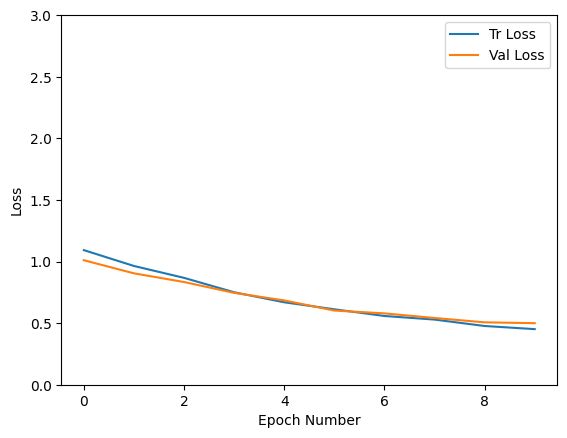

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

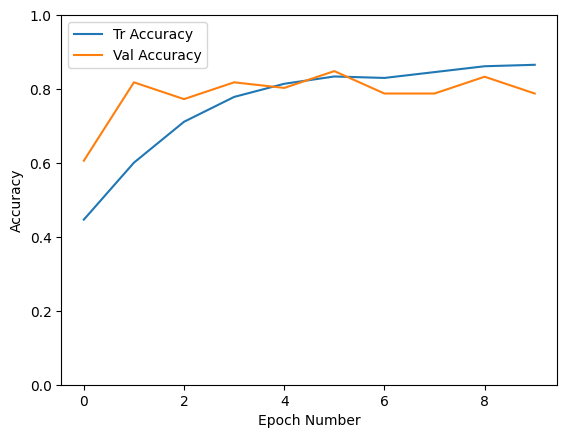

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)



```
# This is formatted as code
```

# Batch Normalization

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate_with_bn(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate with Batch Normalization
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model_bn.pt')

    return best_model, history


In [ ]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate_with_bn(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4191, Accuracy: 87.7470%, 
		Validation : Loss : 0.4766, Accuracy: 83.3333%, Time: 14.0000s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4034, Accuracy: 86.5613%, 
		Validation : Loss : 0.4893, Accuracy: 78.7879%, Time: 15.0783s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3626, Accuracy: 89.3281%, 
		Validation : Loss : 0.4655, Accuracy: 80.3030%, Time: 12.4170s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3727, Accuracy: 87.7470%, 
		Validation : Loss : 0.4294, Accuracy: 84.8485%, Time: 10.3323s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.3264, Accuracy: 90.1186%, 
		Validation : Loss : 0.4264, Accuracy: 83.3333%, Time: 11.6401s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.3402, Accuracy: 88.9328%, 
		Validation : Loss : 0.4318, Accuracy: 77.2727%, Time: 11.8104s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.3148, Accuracy: 88.9328%, 
		Validation : Loss : 0.4123, Accuracy: 84.8485%, Time: 13.2239s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.2917, Accura

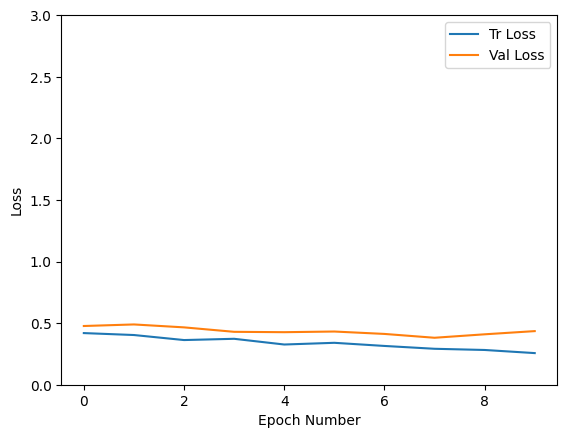

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

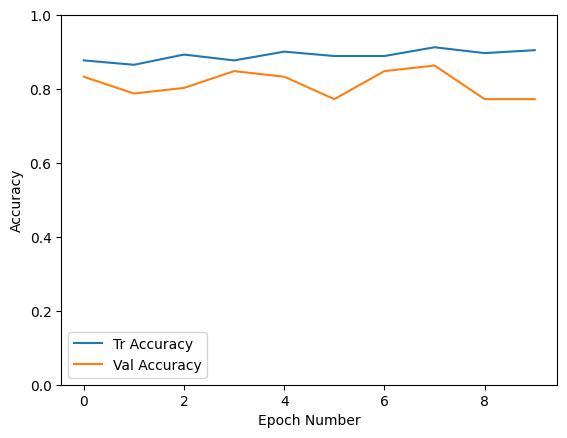

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

# c) Pre-trained Model


c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader


# Define the model (ResNet18 in this example)
class COVID19Model(nn.Module):
    def __init__(self, num_classes=3, pretrained=True):
        super(COVID19Model, self).__init__()
        # Load pre-trained ResNet18
        self.resnet = models.resnet18(pretrained=pretrained)

        # Modify the last fully connected layer for the number of classes in your dataset
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Instantiate the COVID-19 model
model = COVID19Model(num_classes=3, pretrained=True)

# Define loss function and optimizer
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.9MB/s]


COVID19Model(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [10]:
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

def train_and_validate_transfer_learning(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=10, device='cuda'):
    '''
    Function to train and validate a PyTorch model with transfer learning
    Parameters
        :param model: Model to train and validate (pre-trained)
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=10)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (list): Training history containing loss and accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            loss = loss_criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

            _, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            train_acc += acc.item() * inputs.size(0)

        with torch.no_grad():

            model.eval()

            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = loss_criterion(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)

                _, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))
                acc = torch.mean(correct_counts.type(torch.FloatTensor))
                valid_acc += acc.item() * inputs.size(0)

        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        avg_valid_loss = valid_loss / len(test_dataloader.dataset)
        avg_valid_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, Validation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_valid_loss, avg_valid_acc * 100, epoch_end - epoch_start))

        if avg_valid_acc > best_acc:
            best_acc = avg_valid_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [11]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate_transfer_learning(model, loss_criterion, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch: 000, Training: Loss: 0.7948, Accuracy: 69.1700%, Validation : Loss : 0.7958, Accuracy: 65.1515%, Time: 139.7467s
Epoch: 2/10
Epoch: 001, Training: Loss: 0.4515, Accuracy: 83.3992%, Validation : Loss : 0.2080, Accuracy: 90.9091%, Time: 14.4433s
Epoch: 3/10
Epoch: 002, Training: Loss: 0.3974, Accuracy: 84.5850%, Validation : Loss : 0.3774, Accuracy: 84.8485%, Time: 14.8373s
Epoch: 4/10
Epoch: 003, Training: Loss: 0.4934, Accuracy: 82.2134%, Validation : Loss : 0.3829, Accuracy: 87.8788%, Time: 14.5209s
Epoch: 5/10
Epoch: 004, Training: Loss: 0.4630, Accuracy: 82.6087%, Validation : Loss : 0.8043, Accuracy: 68.1818%, Time: 14.5387s
Epoch: 6/10
Epoch: 005, Training: Loss: 0.3007, Accuracy: 89.3281%, Validation : Loss : 0.1230, Accuracy: 96.9697%, Time: 14.4490s
Epoch: 7/10
Epoch: 006, Training: Loss: 0.1922, Accuracy: 94.4664%, Validation : Loss : 0.1487, Accuracy: 90.9091%, Time: 14.3488s
Epoch: 8/10
Epoch: 007, Training: Loss: 0.2934, Accuracy: 89.7233%, Validation : L

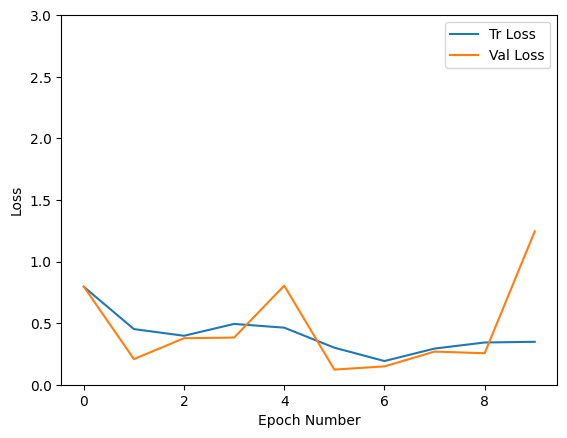

In [12]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

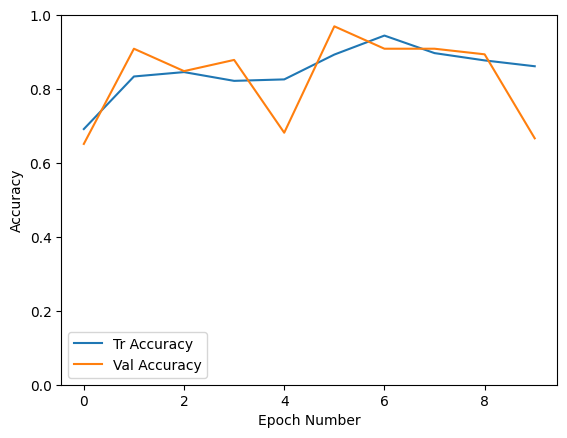

In [13]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    No. This is because usually pre-trained models like resnet require lower learning rates. We would also need to freeze the early layers and train only the later layers to prevent overfitting. Furthermore, CrossEntropyLoss might not be be the best choice for loss function for this datasets, hence other techniques can be used like weight decay.Finally, learning rate schedulers may need to be utilized in the resnet model to prevent overfitting. </span>

# Question 3

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.